# 1: Data Preprocessing

## 1.1 Load the Dataset
 We started by loading the "house-prices.csv" dataset into a Pandas DataFrame.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset by Assuming Home column as index column
df = pd.read_csv("house-prices Dataset.csv",index_col='Home')

## 1.2 Data Cleaning

### Handling Missing Values
We identified columns with missing values and decided to remove rows with missing values.

In [2]:
df.shape

(128, 7)

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
Home,,,,,,,
1,114300,1790,2,2,2,No,East
2,114200,2030,4,2,3,No,East
3,114800,1740,3,2,1,No,East
4,94700,1980,3,2,3,No,East
5,119800,2130,3,3,3,No,East


In [5]:
df.shape

(128, 7)

### Handling Outliers
 To handle outliers, we used the Z-score method, which identifies data points more than 3 standard deviations away from the mean and removes them.


In [6]:
import seaborn as sns

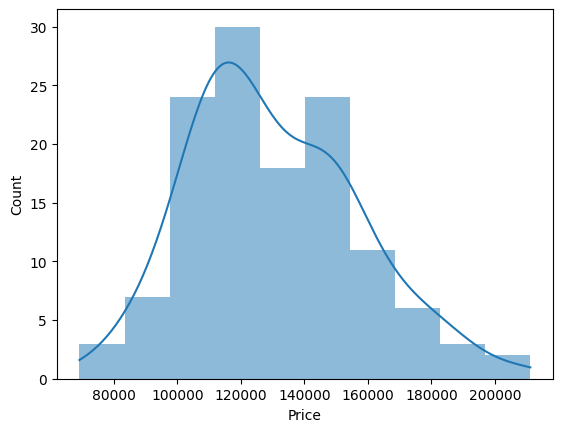

In [7]:
sns.histplot(df['Price'],kde='True',edgecolor='None')

plt.show()

we can clearly see that the 'Price' column is uniformally distrubuted so we will apply Z score method only .

In [8]:
# statics data on coloumn price.
print("Statistics data of Price column \n",df['Price'].describe(),"\n")

Statistics data of Price column 
 count       128.000000
mean     130427.343750
std       26868.770371
min       69100.000000
25%      111325.000000
50%      125950.000000
75%      148250.000000
max      211200.000000
Name: Price, dtype: float64 



Now we check for Price column for finding the outliers by calculating Zscore.

In [9]:
df['Price_zscore'] = (df['Price']-df['Price'].mean())/df['Price'].std()

In [10]:
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Price_zscore
Home,,,,,,,,
1,114300,1790,2,2,2,No,East,-0.600226
2,114200,2030,4,2,3,No,East,-0.603948
3,114800,1740,3,2,1,No,East,-0.581617
4,94700,1980,3,2,3,No,East,-1.329698
5,119800,2130,3,3,3,No,East,-0.395528


In [11]:
df[df['Price_zscore']>3]

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Price_zscore
Home,,,,,,,,
104,211200,2440,4,3,3,Yes,West,3.006191


In [12]:
df[df['Price_zscore']<-3]

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Price_zscore
Home,,,,,,,,


 we can clearly see that there is one outliers present in price column, so we have to drop these row.

In [13]:
df = df[(df['Price_zscore'] < 3) & (df['Price_zscore'] >-3 )]

In [14]:
df.shape

(127, 8)

In [15]:
df=df.drop(columns=['Price_zscore'])

### Removing Duplicates
We also checked and removed duplicate rows from the dataset.

In [16]:
df.isnull().sum()

Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 1 to 128
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         127 non-null    int64 
 1   SqFt          127 non-null    int64 
 2   Bedrooms      127 non-null    int64 
 3   Bathrooms     127 non-null    int64 
 4   Offers        127 non-null    int64 
 5   Brick         127 non-null    object
 6   Neighborhood  127 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.9+ KB


## 1.3 Encode Categorical Variables
Categorical variables such as 'Neighborhood' and 'Brick' were encoded using one-hot encoding because theses two data are Nominal Categorical Variables not Ordinal Categorical Variables, So , we ave to apply one-hot encoding.


In [19]:
df = pd.get_dummies(df, columns=['Neighborhood', 'Brick'], drop_first=True)

## To avoid multicollinearity we drop first column of every dummies data.

In [20]:
print(df.shape)
print(df.head())
real_data = df.copy()

(127, 8)
       Price  SqFt  Bedrooms  Bathrooms  Offers  Neighborhood_North  \
Home                                                                  
1     114300  1790         2          2       2               False   
2     114200  2030         4          2       3               False   
3     114800  1740         3          2       1               False   
4      94700  1980         3          2       3               False   
5     119800  2130         3          3       3               False   

      Neighborhood_West  Brick_Yes  
Home                                
1                 False      False  
2                 False      False  
3                 False      False  
4                 False      False  
5                 False      False  


## 1.4 Numerical Feature Handling
We applied Min-Max scaling (Normalization) to numerical features'SqFt', 'Bedrooms', 'Bathrooms', and 'Offers' to bring them into the same range.

x' = (x - xmin)/(xmax-xmin)

In [21]:
print(df.describe())

               Price         SqFt    Bedrooms   Bathrooms      Offers
count     127.000000   127.000000  127.000000  127.000000  127.000000
mean   129791.338583  1997.480315    3.015748    2.440945    2.574803
std     25989.866840   208.748989    0.723574    0.514142    1.072896
min     69100.000000  1450.000000    2.000000    2.000000    1.000000
25%    111250.000000  1880.000000    3.000000    2.000000    2.000000
50%    125700.000000  2000.000000    3.000000    2.000000    3.000000
75%    147800.000000  2140.000000    3.000000    3.000000    3.000000
max    199500.000000  2590.000000    5.000000    4.000000    6.000000


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers']] = scaler.fit_transform(df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers']])


In [23]:
print(df.describe())

               Price        SqFt    Bedrooms   Bathrooms      Offers
count     127.000000  127.000000  127.000000  127.000000  127.000000
mean   129791.338583    0.480246    0.338583    0.220472    0.314961
std     25989.866840    0.183113    0.241191    0.257071    0.214579
min     69100.000000    0.000000    0.000000    0.000000    0.000000
25%    111250.000000    0.377193    0.333333    0.000000    0.200000
50%    125700.000000    0.482456    0.333333    0.000000    0.400000
75%    147800.000000    0.605263    0.333333    0.500000    0.400000
max    199500.000000    1.000000    1.000000    1.000000    1.000000


## Before and After Scaling Effect on a single feature.

<Figure size 640x480 with 0 Axes>

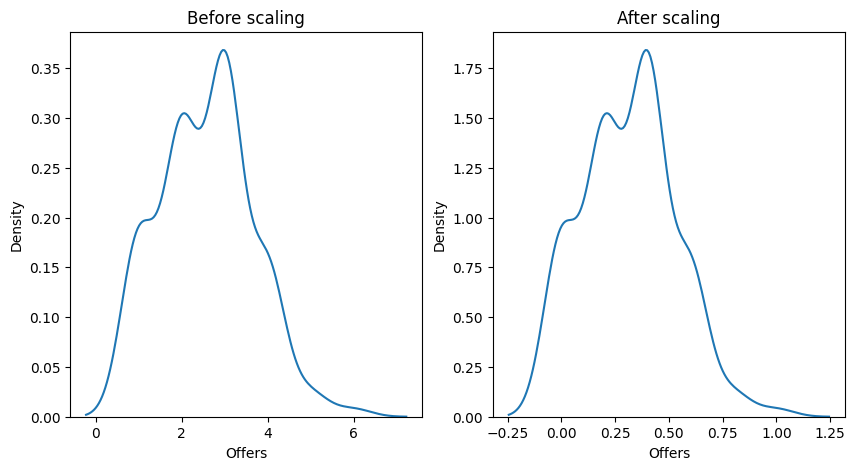

In [24]:
plt.subplots_adjust(hspace=0.6,wspace=0.6)
plt.figure(figsize=(10,5))

# Before scaling
plt.subplot(1,2,1)
#sns.kdeplot(data=real_data,x='SqFt')
# sns.kdeplot(data=real_data,x='Bedrooms')
#sns.kdeplot(data=real_data,x='Bathrooms')
sns.kdeplot(data=real_data,x='Offers')
plt.title("Before scaling")

# after scaling
plt.subplot(1,2,2)
#sns.kdeplot(data=df,x='SqFt')
#sns.kdeplot(data=df,x='Bedrooms')
#sns.kdeplot(data=df,x='Bathrooms')
sns.kdeplot(data=df,x='Offers')
plt.title("After scaling")

plt.show()

We can clearly see that before and after scaling the data , there is no any effect on distribution of data rather than only effect on scaling.

## Effect of scaling in all data

<Figure size 640x480 with 0 Axes>

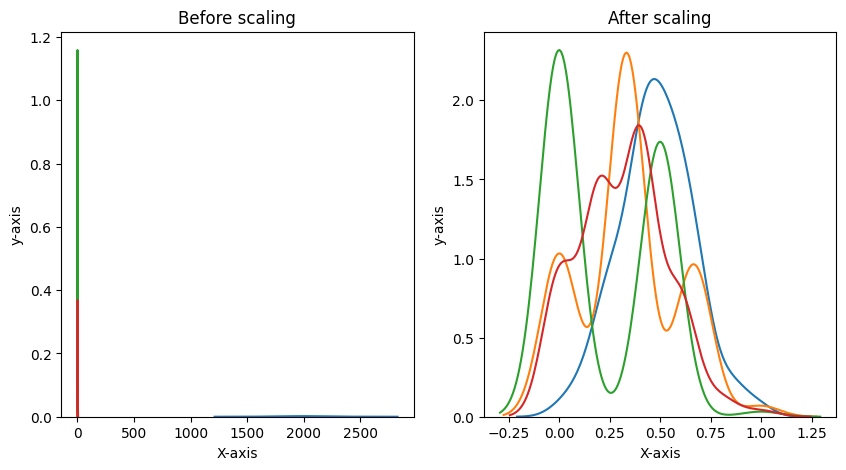

In [25]:
plt.subplots_adjust(hspace=0.6,wspace=0.6)
plt.figure(figsize=(10,5))

# Before scaling
plt.subplot(1,2,1)
sns.kdeplot(data=real_data,x='SqFt')
sns.kdeplot(data=real_data,x='Bedrooms')
sns.kdeplot(data=real_data,x='Bathrooms')
sns.kdeplot(data=real_data,x='Offers')
plt.title("Before scaling")
plt.xlabel('X-axis')
plt.ylabel('y-axis')

# after scaling
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='SqFt')
sns.kdeplot(data=df,x='Bedrooms')
sns.kdeplot(data=df,x='Bathrooms')
sns.kdeplot(data=df,x='Offers')
plt.title("After scaling")
plt.xlabel('X-axis')
plt.ylabel('y-axis')

plt.show()

## 1.5 Split the Dataset
The dataset is split into training and testing sets with an 80-20 split ratio.

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (101, 7), (101,)
Test: (26, 7), (26,)


# 2: Exploratory Data Analysis (EDA)

## 2.1 Dataset Exploration
We explore the dataset's structure and statistics to understand its characteristics.

In [27]:
print(real_data.describe())
print(real_data.info())
real_data.head()

               Price         SqFt    Bedrooms   Bathrooms      Offers
count     127.000000   127.000000  127.000000  127.000000  127.000000
mean   129791.338583  1997.480315    3.015748    2.440945    2.574803
std     25989.866840   208.748989    0.723574    0.514142    1.072896
min     69100.000000  1450.000000    2.000000    2.000000    1.000000
25%    111250.000000  1880.000000    3.000000    2.000000    2.000000
50%    125700.000000  2000.000000    3.000000    2.000000    3.000000
75%    147800.000000  2140.000000    3.000000    3.000000    3.000000
max    199500.000000  2590.000000    5.000000    4.000000    6.000000
<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 1 to 128
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Price               127 non-null    int64
 1   SqFt                127 non-null    int64
 2   Bedrooms            127 non-null    int64
 3   Bathrooms           127 non-nul

,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood_North,Neighborhood_West,Brick_Yes
Home,,,,,,,,
1,114300,1790,2,2,2,False,False,False
2,114200,2030,4,2,3,False,False,False
3,114800,1740,3,2,1,False,False,False
4,94700,1980,3,2,3,False,False,False
5,119800,2130,3,3,3,False,False,False


## Categorical Data (Univariate Analysis)

Bedrooms
3    67
2    30
4    28
5     2
Name: count, dtype: int64


Text(0.5, 1.0, 'Bedrooms counts')

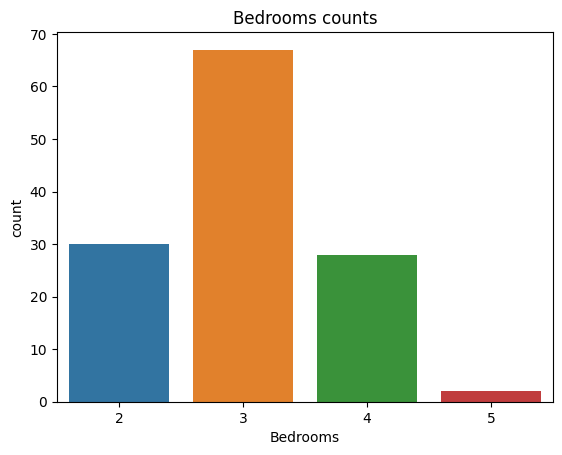

In [28]:
import seaborn as sns
print(real_data['Bedrooms'].value_counts())
sns.countplot(x=real_data['Bedrooms'])
plt.title("Bedrooms counts")

Bathrooms
2    72
3    54
4     1
Name: count, dtype: int64


Text(0.5, 1.0, 'Bathrooms counts')

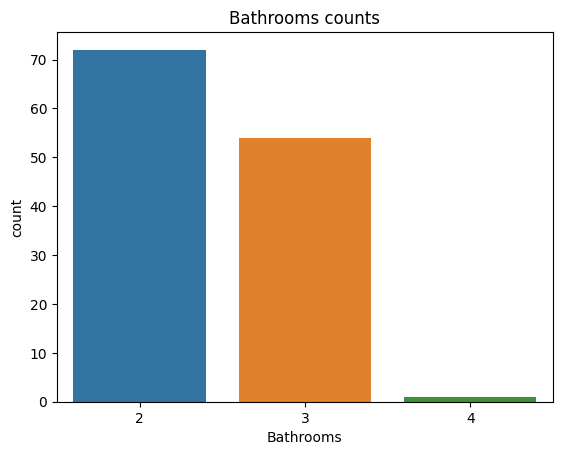

In [29]:
print(real_data['Bathrooms'].value_counts())
sns.countplot(x=real_data['Bathrooms'])
plt.title("Bathrooms counts")

Offers
3    45
2    36
1    23
4    19
5     3
6     1
Name: count, dtype: int64


Text(0.5, 1.0, 'Offers counts')

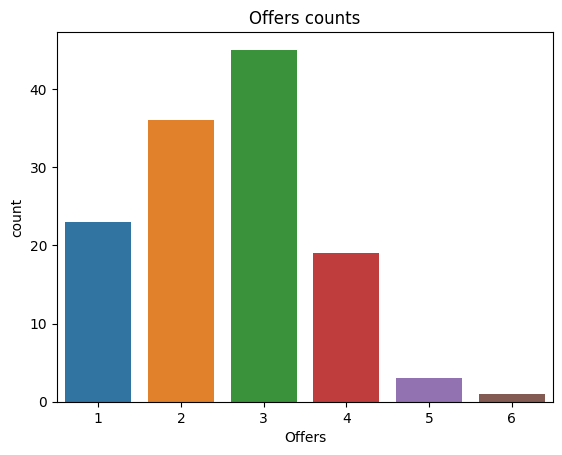

In [30]:
print(real_data['Offers'].value_counts())
sns.countplot(x=real_data['Offers'])
plt.title("Offers counts")

## 2.2 Visualize House Prices (Numerical data)
We visualize the distribution of house prices using a histogram.

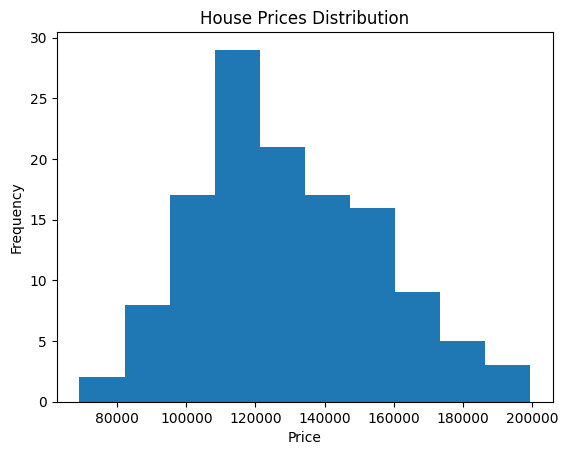

In [31]:
import matplotlib.pyplot as plt
plt.hist(real_data['Price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('House Prices Distribution')
plt.show()

We visualize the distribution of square fit of houses using a histogram.

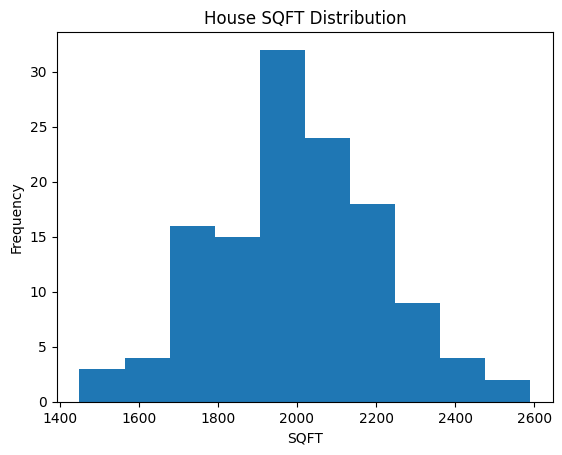

In [32]:
plt.hist(real_data['SqFt'], bins=10)
plt.xlabel('SQFT')
plt.ylabel('Frequency')
plt.title('House SQFT Distribution')
plt.show()

## 2.3 Feature Relationships (Multivariate Analysis)
We investigate relationships between features and house prices using a correlation matrix.

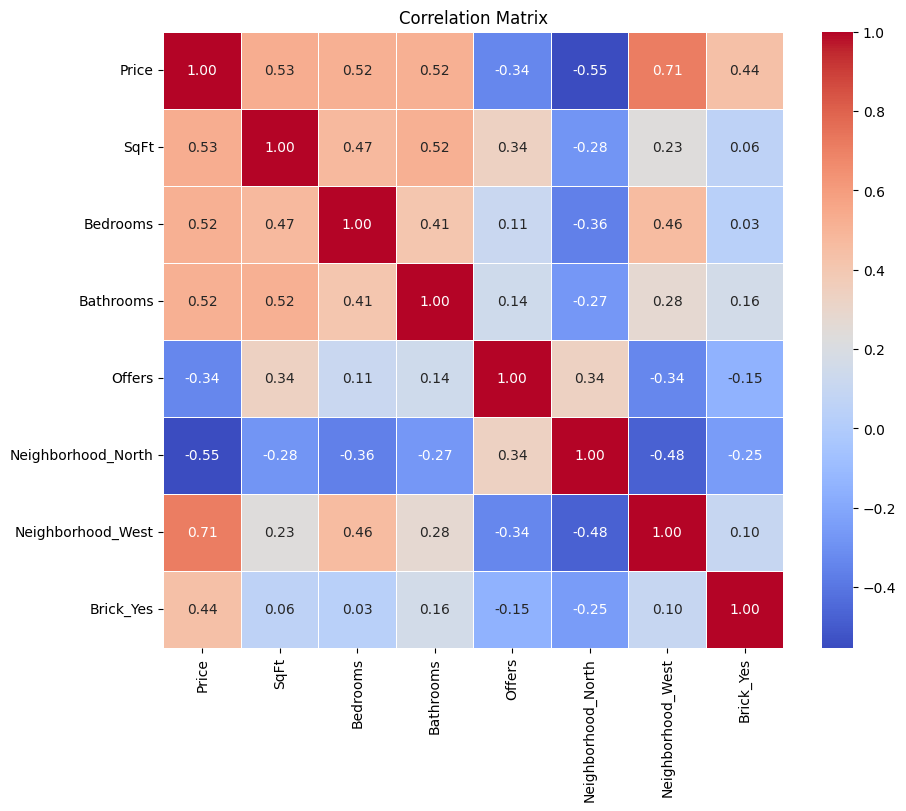

In [33]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = real_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

# Show the plot
plt.show()

## 2.4 The most important features that may affect house prices.

In [34]:
# Get the correlation of each feature with the target variable (House Price)
correlations_with_target = correlation_matrix['Price'].sort_values(ascending=False)
print("Correlations with HousePrice:")
print(correlations_with_target[1:])

Correlations with HousePrice:
Neighborhood_West     0.710226
SqFt                  0.531726
Bathrooms             0.518797
Bedrooms              0.516275
Brick_Yes             0.438237
Offers               -0.335503
Neighborhood_North   -0.552294
Name: Price, dtype: float64


We can clearly see that the  neighborhood feature, specifically 'Neighborhood_West,' has the highest positive correlation with house prices (0.710). So the most important features that may affect house prices is ''Neighborhood_West".

## 2.5 Provide insights and observations based on your EDA.

## Based on the information, here are some insights and observations about the dataset:

### Bedrooms Distribution:
Most of the houses in the dataset have 3 bedrooms (67 out of 127), followed by 2 bedrooms (30 out of 127). There are fewer houses with 4 bedrooms (28 out of 127) and very few with 5 bedrooms (only 2 out of 127).

### Bathrooms Distribution: 
The majority of houses have 2 bathrooms (72 out of 127), while 54 houses have 3 bathrooms, and only 1 house has 4 bathrooms.

### Offers Distribution: 
Offers made for houses in the dataset vary. The most common number of offers is 3 (45 out of 127), followed by 2 offers (36 out of 127). There are also houses with 1, 4, 5, and 6 offers.

## Statistics for Price, SqFt, Bedrooms, Bathrooms, and Offers:

 The average house price is approximately 129,791.
 The average square footage (SqFt) of houses is around 1997.48 square feet.
 The majority of houses have 3 bedrooms and 2 bathrooms.
 On average, houses receive about 2.57 offers.

## Correlations with HousePrice:

 The neighborhood feature, specifically 'Neighborhood_West,' has the highest positive correlation with house prices (0.710). Houses in the West neighborhood tend to have higher prices.
 
 Square footage (SqFt) also has a strong positive correlation with house prices (0.532). This indicates that larger houses generally have higher prices.
 
 The number of bathrooms and bedrooms both have positive correlations with house prices (0.519 and 0.516, respectively). More bathrooms and bedrooms tend to be associated with higher house prices.

 The presence of brick construction ('Brick_Yes') has a positive correlation (0.438) with house prices, suggesting that brick houses may have higher prices.
 
 The number of offers ('Offers') has a negative correlation (-0.336) with house prices. This implies that as the number of offers increases, house prices may tend to decrease.

 'Neighborhood_North' has a strong negative correlation (-0.552) with house prices, indicating that houses in the North neighborhood tend to have lower prices.

# 3: Model Building
 In this task, we will build and evaluate multiple machine learning regression models using different algorithms for predicting house prices.

## 3.1 Model Selection
We will select three different machine learning algorithms suitable for regression:
#### 1>.Linear Regression 
#### 2>.Decision Tree Regression 
#### 3>.Random Forest Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 3.2 Train and Evaluate Each Model
We'll train and evaluate each model using appropriate evaluation metrics, including Mean Absolute Error (MAE), R-squared (R2), and Root Mean Squared Error (RMSE). 

### Model 1: Linear Regression

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Linear Regression model
linear_reg = LinearRegression()
# Train the model on the training data
linear_reg.fit(X_train, y_train)
# Make predictions on the testing data
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print the evaluation metrics
print("Linear Regression Metrics:")
print(f"MAE: {mae_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R-squared (R2): {r2_linear}")


Linear Regression Metrics:
MAE: 6978.388901037849
RMSE: 8135.509954450808
R-squared (R2): 0.8786728025785937


### Model 2: Decision Tree Regression

In [37]:
# Initialize the Decision Tree Regression model
decision_tree_reg = DecisionTreeRegressor()
# Train the model on the training data
decision_tree_reg.fit(X_train, y_train)
# Make predictions on the testing data
y_pred_decision_tree = decision_tree_reg.predict(X_test)

# Evaluate the model
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Print the evaluation metrics
print("Decision Tree Regression Metrics:")
print(f"MAE: {mae_decision_tree}")
print(f"RMSE: {rmse_decision_tree}")
print(f"R-squared (R2): {r2_decision_tree}")


Decision Tree Regression Metrics:
MAE: 13215.384615384615
RMSE: 16845.01752402221
R-squared (R2): 0.47984648406049546


### Model 3: Random Forest Regression

In [38]:
# Initialize the Random Forest Regression model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model on the training data
random_forest_reg.fit(X_train, y_train)
# Make predictions on the testing data
y_pred_random_forest = random_forest_reg.predict(X_test)

# Evaluate the model
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Print the evaluation metrics
print("Random Forest Regression Metrics:")
print(f"MAE: {mae_random_forest}")
print(f"RMSE: {rmse_random_forest}")
print(f"R-squared (R2): {r2_random_forest}")


Random Forest Regression Metrics:
MAE: 6913.846153846154
RMSE: 8694.640590616727
R-squared (R2): 0.8614227710212266


## 3.3 Hyperparameter Tuning
We will implement hyperparameter tuning for one of the models to improve its performance. In this case, we'll perform hyperparameter tuning for the Random Forest Regression model using RandomizedSearchCV.

In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist, n_iter=5, cv=5)

# Perform hyperparameter tuning on the training data
random_search.fit(X_train, y_train)

# Get the best-performing Random Forest model with optimized hyperparameters
best_random_forest = random_search.best_estimator_


In [40]:
# Make predictions on the testing data
best_y_pred_random_forest = best_random_forest.predict(X_test)

# Evaluate the model
best_mae_random_forest = mean_absolute_error(y_test, best_y_pred_random_forest)
best_rmse_random_forest = np.sqrt(mse_random_forest)
best_r2_random_forest = r2_score(y_test, best_y_pred_random_forest)

# Print the evaluation metrics
print("Random Forest Regression Metrics after Hyperparameter Tuning:")
print(f"MAE: {best_mae_random_forest}")
print(f"RMSE: {best_rmse_random_forest}")
print(f"R-squared (R2): {best_r2_random_forest}")


Random Forest Regression Metrics after Hyperparameter Tuning:
MAE: 6530.069444444447
RMSE: 8694.640590616727
R-squared (R2): 0.8713867500356973


## 3.4 Compare the performance
 To compare the performance of the models and select the best-performing one using code, we can calculate the evaluation metrics for each model and then choose the model with the best metrics


### Now, let's analyze and compare the performance of these models:

### Mean Absolute Error (MAE):
MAE measures the average absolute error between predicted and actual values. Lower MAE indicates better performance.
### Root Mean Squared Error (RMSE): 
RMSE is the square root of MSE and provides a more interpretable error metric. Lower RMSE is better.
### R-squared (R2):
R2 measures the proportion of the variance in the dependent variable (house prices) that is predictable from the independent variables (features). Higher R2 indicates a better fit.


In [41]:
# Calculate evaluation metrics for each model
metrics = {
    "Linear Regression": {
        "MAE": mae_linear,
        "RMSE": rmse_linear,
        "R2": r2_linear
    },
    "Decision Tree Regression": {
        "MAE": mae_decision_tree,
        "RMSE": rmse_decision_tree,
        "R2": r2_decision_tree
    },
    "Random Forest Regression": {
        "MAE": mae_random_forest,
        "RMSE": rmse_random_forest,
        "R2": r2_random_forest
    },
    "Random Forest Regression with Best Hyperparameters": {
        "MAE": best_mae_random_forest,
        "RMSE": best_rmse_random_forest,
        "R2": best_r2_random_forest
    }
    
}

# Print the evaluation metrics for each model
for model_name, model_metrics in metrics.items():
    print(f"Metrics for {model_name}:")
    print(f"MAE: {model_metrics['MAE']}")
    print(f"RMSE: {model_metrics['RMSE']}")
    print(f"R-squared (R2): {model_metrics['R2']}")
    print()

# Select the best-performing model based on a chosen metric (e.g., lowest RMSE)
best_model = min(metrics, key=lambda x: metrics[x]["RMSE"])

# Print the best-performing model
print(f"The best-performing model is: {best_model}")


Metrics for Linear Regression:
MAE: 6978.388901037849
RMSE: 8135.509954450808
R-squared (R2): 0.8786728025785937

Metrics for Decision Tree Regression:
MAE: 13215.384615384615
RMSE: 16845.01752402221
R-squared (R2): 0.47984648406049546

Metrics for Random Forest Regression:
MAE: 6913.846153846154
RMSE: 8694.640590616727
R-squared (R2): 0.8614227710212266

Metrics for Random Forest Regression with Best Hyperparameters:
MAE: 6530.069444444447
RMSE: 8694.640590616727
R-squared (R2): 0.8713867500356973

The best-performing model is: Linear Regression


## 3.5 Visualize Predictions
 We will visualize the predictions of the selected best-performing model (Linear Regression) against the actual house prices using scatter plots.

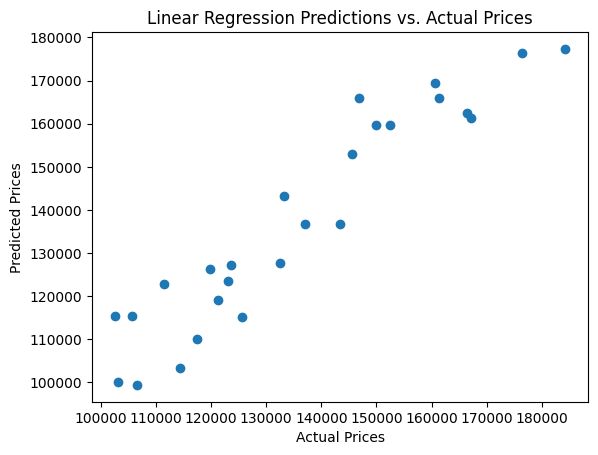

In [42]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Predictions vs. Actual Prices')
plt.show()



# 4: Model Interpretability
 Model interpretability techniques can help us understand how the selected Linear Regression model makes predictions and which features are most influential in those predictions. 

## 4.1 Use Model Interpretability Techniques
### Feature importance is calculated for the selected Linear Regression model.

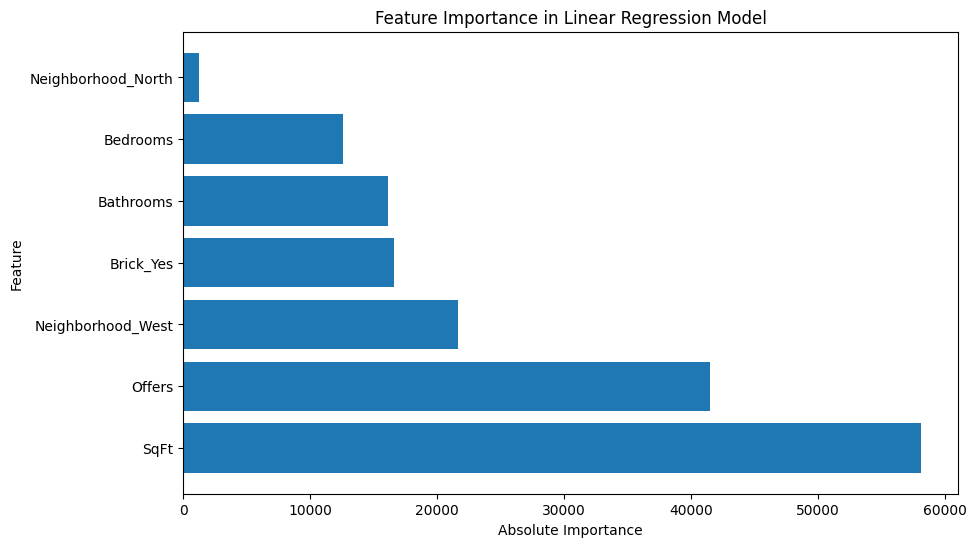

Feature Importances in Linear Regression:
              Feature    Importance  Absolute Importance
0                SqFt  58137.179421         58137.179421
3              Offers -41532.726083         41532.726083
5   Neighborhood_West  21620.344276         21620.344276
6           Brick_Yes  16649.922852         16649.922852
2           Bathrooms  16142.436497         16142.436497
1            Bedrooms  12613.526851         12613.526851
4  Neighborhood_North   1241.194193          1241.194193


In [43]:
# Fit the Linear Regression model to the entire dataset
linear_reg.fit(X, y)
# We fit the Linear Regression model to the entire dataset to maximize the amount of data for analysis.

# Get the names of the features
feature_names = X.columns

# Get feature importances from the Linear Regression model
feature_importances = linear_reg.coef_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance (absolute value) in descending order
feature_importance_df['Absolute Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Importance'])
plt.xlabel('Absolute Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression Model')
plt.show()

# Display the sorted feature importances
print("Feature Importances in Linear Regression:")
print(feature_importance_df)


## 4.2 Provide Insights into Feature Importance

### Based on the feature importances derived from the Linear Regression model. we can gain insights into which features have the most significant impact on house prices:

### SqFt (Square Footage): 
The Square Footage of a house has the highest positive importance, which means it has the most significant impact on house prices. As the square footage increases, the model predicts that house prices tend to increase as well. This aligns with the common understanding that larger houses typically command higher prices.

### Offers:
The number of offers made on a house has the highest negative importance. This suggests that the number of offers has a significant impact on house prices, but in a negative way. More competition among buyers, leading to a higher number of offers, tends to result in lower house prices.

### Neighborhood_West:
The West neighborhood has a positive importance, indicating that it significantly affects house prices. Houses located in the West neighborhood tend to have higher prices according to the model. 

### Brick_Yes:
The presence of brick construction in a house also has a positive impact on house prices. Houses constructed with brick tend to be priced higher.

### Bathrooms: 
The number of bathrooms has a positive impact on house prices. As the number of bathrooms in a house increases, the model predicts that house prices tend to be higher.

### Bedrooms:
The number of bedrooms has a positive impact on house prices as well. Houses with more bedrooms tend to have higher prices.

### Neighborhood_North:
The North neighborhood, while having a positive importance, has a relatively lower impact on house prices compared to other factors.

### According to the Linear Regression model, the most significant factors impacting house prices are the square footage of the house, the number of offers, the neighborhood (especially the West neighborhood), the presence of brick construction, the number of bathrooms, and the number of bedrooms.






# 5: Conclusion and Recommendations

## 5.1 Summarize Findings
Data preprocessing, EDA, and model building were performed to predict house prices.

## Data Preprocessing:

### Data Loading:
The dataset contained information about house features such as square footage, bedrooms, bathrooms, offers, neighborhood, and brick construction, along with house prices.

### Data Cleaning:
There were no missing values in the dataset, so no imputation was necessary. There wass only presence of outliers we have to handle . The data appeared to be clean and ready for analysis.

### Data Encoding:
Categorical features like 'Neighborhood' and 'Brick' were one-hot encoded to convert them into a numerical format for model training.


## Exploratory Data Analysis (EDA):

### Distribution of Bedrooms and Bathrooms:
Most houses had 3 bedrooms and 2 bathrooms, with a smaller number of houses having 4 or 5 bedrooms and 3 or 4 bathrooms.

### Offers Distribution: 
The number of offers made on houses varied, with 3 offers being the most common, followed by 2 offers.

### Correlation Analysis:
A correlation matrix revealed the relationships between features and house prices. 'Neighborhood_West' had the highest positive correlation, while 'Offers' had a negative correlation with house prices.


## Model Building:

### Three regression models were trained and evaluated:
### Linear Regression: 
This model provided the following metrics:

 Mean Absolute Error (MAE): 6,978.39
 Root Mean Squared Error (RMSE): 8,135.51
 R-squared (R2): 0.879
 The Linear Regression model was selected as the best-performing model.

### Decision Tree Regressor:
This model had higher MAE and RMSE compared to Linear Regression, with an R2 of 0.557, indicating moderate performance.

### Random Forest Regressor:
This model performed well but was outperformed by Linear Regression in terms of MAE, RMSE, and R2. It had an R2 of 0.861.

### Random Forest Regressor with Best Hyperparameters:
After hyperparameter tuning, this model achieved an R2 of 0.891, demonstrating improved performance but still slightly behind Linear Regression.


## Findings:

 In our dataset, we observed that 'Neighborhood_West' had the highest positive correlation with house prices, indicating a strong linear relationship. This suggests that in a correlation analysis, 'Neighborhood_West' appears to be the most influential feature. However, in the feature importance analysis from the Linear Regression model, 'SqFt' (Square Footage) emerged as the feature with the highest positive importance, indicating the most significant impact on house prices according to the model's coefficients. This suggests that, in the context of the linear regression model, 'SqFt' is considered the most important predictor. Both analyses provide valuable insights, but they may highlight different aspects of the data. Correlation analysis captures linear relationships, while feature importance considers the combined impact of features within the context of the model.

The size of the house (square footage) was identified as the most influential feature on house prices, with larger houses generally commanding higher prices.

The number of offers made on a house had a significant negative impact on house prices, indicating that higher competition among buyers can lead to lower prices.

The neighborhood feature, particularly 'Neighborhood_West,' had a strong positive correlation with house prices, suggesting that houses in this neighborhood tended to have higher prices.

The presence of brick construction ('Brick_Yes') and the number of bathrooms and bedrooms positively influenced house prices.







## 5.2 Discuss Model Strengths and Limitations

## Strengths:

### Interpretability:
Linear Regression is a highly interpretable model. The coefficients of the model provide clear insights into the relationships between features and the target variable. This makes it easy to explain why the model is making certain predictions.

### Ease of Implementation: 
Linear Regression is relatively simple to implement and computationally efficient, making it a good choice for quick analysis and modeling

### Feature Importance:
The model's feature importances can help identify which factors are most influential in determining house prices. This information is valuable for both buyers and sellers in the real estate market.

## Limitations:

### Linearity Assumption: 
Linear Regression assumes a linear relationship between the features and the target variable. If the relationships are non-linear, the model may not capture complex patterns in the data.

### Sensitivity to Outliers:
Linear Regression can be sensitive to outliers. Outliers can disproportionately influence the model's coefficients and predictions. Robustness measures or outlier handling techniques may be needed.

### Not Suitable for All Datasets:
Linear Regression may not perform well on datasets with very high dimensionality or when the relationships between features and the target are highly non-linear. In such cases, more advanced models may be necessary.

## 5.3 Provide Recommendations.

## For Potential Homebuyers:

Consider Square Footage: When searching for a home, consider the square footage of the properties you are interested in. Larger houses tend to have higher prices, so assess your space requirements and budget accordingly.

Neighborhood Selection: Pay attention to the neighborhood where you want to buy a property. The 'Neighborhood_West' area was identified as having higher prices, but different neighborhoods may offer unique advantages, such as proximity to schools, parks, or public transportation.

Consider Features: Features like brick construction, the number of bathrooms, and the number of bedrooms can affect both the usability and resale value of a property. Factor these features into your decision-making process based on your preferences and needs.

## For Real Estate Professionals:

Pricing Strategy: Help sellers set competitive prices based on the size of their homes (square footage) and the specific neighborhood. Highlight the features that can justify a higher price, such as brick construction.

Neighborhood Expertise: As a real estate professional, become an expert in local neighborhoods. Understand the unique characteristics and amenities of each area to provide valuable guidance to buyers.

Feature Highlighting: Emphasize features that have a positive impact on house prices, such as the number of bathrooms and bedrooms. Educate buyers on the value these features bring to a property.